In [1]:
# POPULATION ANALYSIS: pupil & behaviour effect

# import list
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import main_funcs as mfun
import utils_funcs as utils
import plot_funcs as pfun
import matplotlib.pyplot as plt
import pickle
from scipy import stats
from itertools import compress
import seaborn as sns

#parameters
fRate = 1000/30.0
pre_frames    = 2000.0# in ms
pre_frames    = int(np.ceil(pre_frames/fRate))
post_frames   = 6000.0 # in ms
post_frames   = int(np.ceil(post_frames/fRate))
analysis_time = 1000.0 # in ms
analysis_time = int(np.ceil(analysis_time/fRate))
simulationDur_ms = 350.0 # in ms
simulationDur = int(np.ceil(simulationDur_ms/fRate))

#paths

savefigpath  = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\figs\\'
analysispath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\'

# load data

infoPath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\infoForAnalysis-readyForPlotting.pkl'
dff_traceBoth, dff_traceVis, dff_traceOpto, dff_meanBoth1sec, dff_meanVis1sec, dff_meanOpto1sec   = pd.read_pickle(infoPath) 


infoPath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\infoForAnalysis-readyForPlottingPupil.pkl'
pupil_traceVis, pupil_traceBoth, pupil_traceOpto   = pd.read_pickle(infoPath) 

infoPath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\infoForAnalysis-extracted.pkl'
info = pd.read_pickle(infoPath) 



Env: clapfcstimulation


2924
4279
4
3


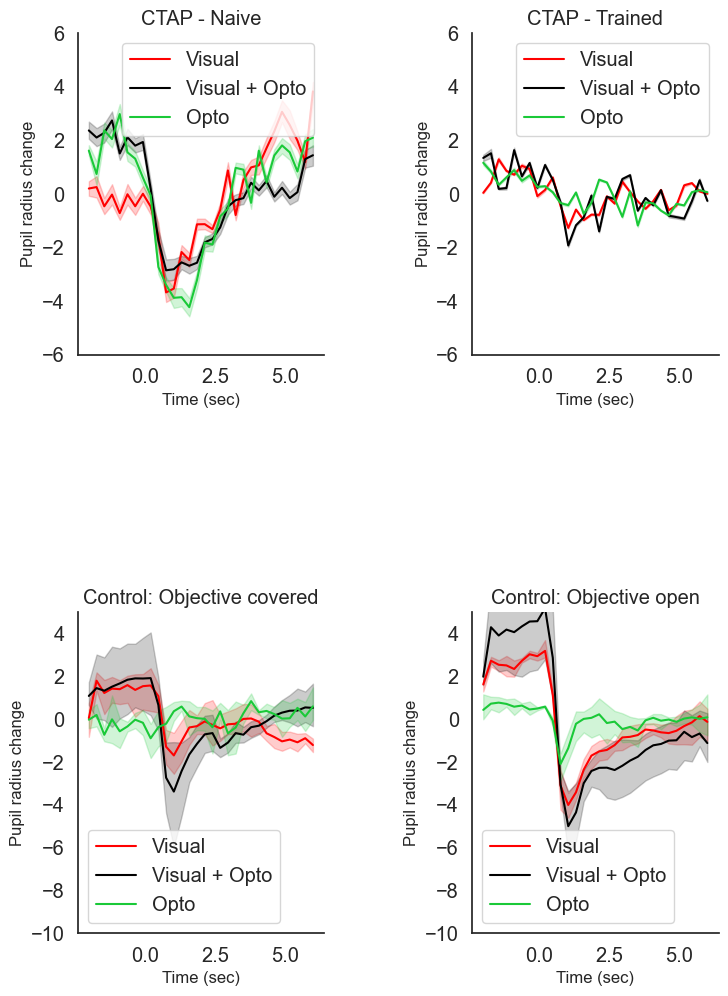

In [8]:
# Average pupil responses for visual, opto and visual + opto trials
# load data

tTypes = [ 'Visual + Opto','Visual','Opto']

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(8.27, 11.69))
plt.subplots_adjust( hspace = 0.8, wspace = 0.6)
pfun.set_figure()

responsiveSensory, responsiveNoSensory = mfun.selectInterestedcells ( 'CTAP', 'Naive', responsive = True, plotValues = False, pupil = True )
responsive = responsiveSensory #| responsiveNoSensory
print(sum(responsive))
pfun.lineplot_withSEM_pupil (pupil_traceVis[responsive].transpose(), 0, tTypes[1], axs[0,0])
pfun.lineplot_withSEM_pupil (pupil_traceBoth[responsive].transpose(), 1, tTypes[0], axs[0,0])
pfun.lineplot_withSEM_pupil (pupil_traceOpto[responsive].transpose(), 2, tTypes[2], axs[0,0])
axs[0,0].set_title( 'CTAP - Naive')
axs[0,0].set_ylim(-6, 6)
axs[0,0].set_ylabel('Pupil radius change')

responsiveSensory, responsiveNoSensory = mfun.selectInterestedcells ( 'CTAP', 'Trained', responsive = False, plotValues = False, pupil = True )
responsive = responsiveSensory
print(sum(responsive))
pfun.lineplot_withSEM_pupil (pupil_traceVis[responsive].transpose(), 0, tTypes[1], axs[0,1])
pfun.lineplot_withSEM_pupil (pupil_traceBoth[responsive].transpose(), 1, tTypes[0], axs[0,1])
pfun.lineplot_withSEM_pupil (pupil_traceOpto[responsive].transpose(), 2, tTypes[2], axs[0,1])
axs[0,1].set_title( 'CTAP - Trained')
axs[0,1].set_ylabel('Pupil radius change')
axs[0,1].set_ylim(-6, 6)

responsiveSensory, responsiveNoSensory = mfun.selectInterestedcells ( 'Control', 'Pupil-control-coveredMicroscope', responsive = False, plotValues = False, pupil = True )
responsive = responsiveSensory# | responsiveNoSensory
print(sum(responsive))
pfun.lineplot_withSEM_pupil (pupil_traceVis[responsive].transpose(), 0, tTypes[1], axs[1,0])
pfun.lineplot_withSEM_pupil (pupil_traceBoth[responsive].transpose(), 1, tTypes[0], axs[1,0])
pfun.lineplot_withSEM_pupil (pupil_traceOpto[responsive].transpose(), 2, tTypes[2], axs[1,0])
axs[1,0].set_title( 'Control: Objective covered')
axs[1,0].set_ylabel('Pupil radius change')
axs[1,0].set_ylim(-10, 5)

responsiveSensory, responsiveNoSensory = mfun.selectInterestedcells ( 'Control', 'Pupil-control-not-coveredMicroscope', responsive = False, plotValues = False, pupil = True )
responsive = responsiveSensory# | responsiveNoSensory
print(sum(responsive))
pfun.lineplot_withSEM_pupil (pupil_traceVis[responsive].transpose(), 0, tTypes[1], axs[1,1])
pfun.lineplot_withSEM_pupil (pupil_traceBoth[responsive].transpose(), 1, tTypes[0], axs[1,1])
pfun.lineplot_withSEM_pupil (pupil_traceOpto[responsive].transpose(), 2, tTypes[2], axs[1,1])
axs[1,1].set_title( 'Control: Objective open')
axs[1,1].set_ylim(-10, 5)
axs[1,1].set_ylabel('Pupil radius change')

pfun.save_figure( 'Figure4_AveragePupil',savefigpath)
